# Brief Introduction to Pandas and Scikit Learn

### Sections

- [Access a Website and Download a Data File](#Access-a-Website-and-Download-a-Data-File)
- [Data Visualization](#Data-Visualization)
- [Scikit Learn Procedure](#Scikit-Learn-Procedure)
- [Multiclass Classification](#Multiclass-Classification)

### Access a Website and Download a Data File (write to current directory)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
#from urllib.request import urlopen

###### Read a data set directrly from a website, without saving it to a directory (you can if you like). This data does not have a header so you need to define the column titles separately. Sometimes data sets come with instructions and this information will be contained within them.

In [33]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data',header=None,sep='\s+')

In [4]:
df.columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

In [5]:
df.to_csv('housing.csv')

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


###### Rows and columns of the dataframe can be accessed in several ways, here are two examples.

In [7]:
df.loc[0]

CRIM         0.00632
ZN          18.00000
INDUS        2.31000
CHAS         0.00000
NOX          0.53800
RM           6.57500
AGE         65.20000
DIS          4.09000
RAD          1.00000
TAX        296.00000
PTRATIO     15.30000
B          396.90000
LSTAT        4.98000
MEDV        24.00000
Name: 0, dtype: float64

In [8]:
df.loc[:3]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4


In [9]:
df['RM'][:5]

0    6.575
1    6.421
2    7.185
3    6.998
4    7.147
Name: RM, dtype: float64

In [10]:
df[['RM']][:5]

,RM
0,6.575
1,6.421
2,7.185
3,6.998
4,7.147


[[back to top](#Sections)]

### Data Visualization

###### Construct a Pair-plot of the Data

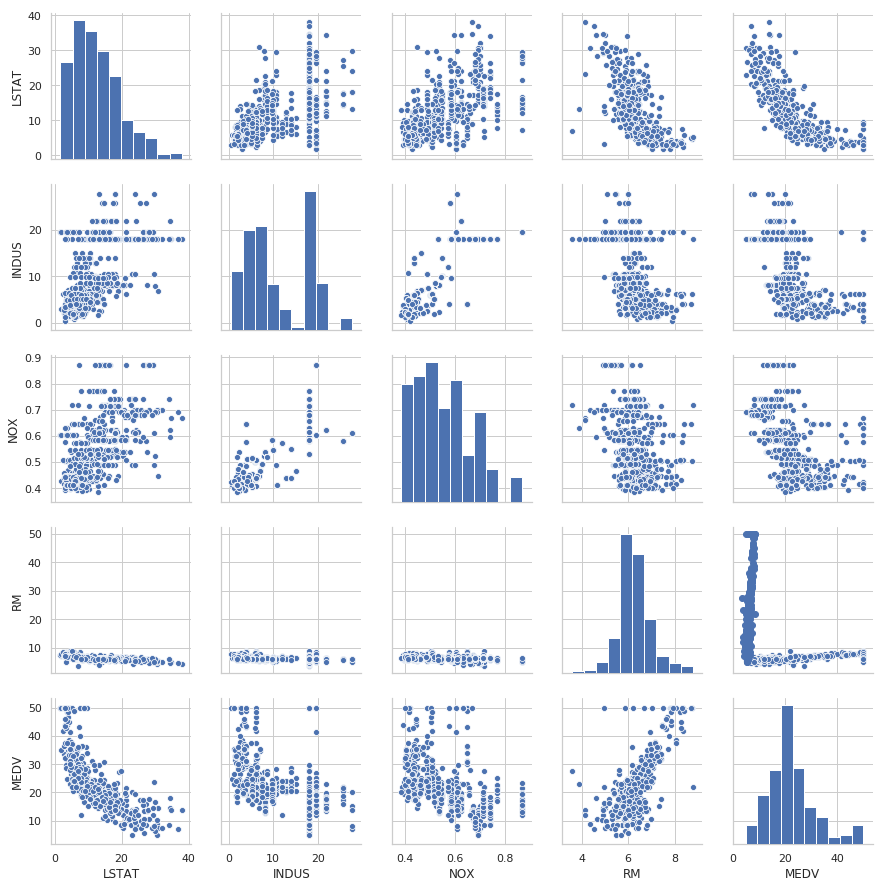

In [11]:
sns.set(style='whitegrid',context='notebook')
cols = ['LSTAT','INDUS','NOX','RM','MEDV']
sns.pairplot(df[cols],height=2.5)
plt.scatter(df['RM'],df['MEDV']);plt.xlabel('RM');plt.ylabel('MEDV');

###### Construct a heatmap revealing the correlation matrix relating the variables in the previous pair plot

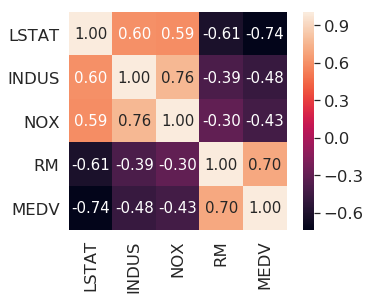

In [12]:
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size':15},
                yticklabels=cols,
                xticklabels=cols)

[[back to top](#Sections)]

### Scikit Learn Procedure

###### Step 1: Import the class that you plan to use -- scikit-learn is organized into several classes such as
* neighbors
* neural_network
* trees
* cross-validation
* lda
* etc.

###### Step 2: Instantiate the estimator (model) -- instantiate the object that you plan to use
* name of the object does not matter
* specify tuning parameters (hyperparameters)
* unspecified tuning parameters are set to defaults

###### Step 3: Fit the model with data (model training) -- occurs in-place (does not return an object) so it does not need to be assigned to an output

###### Step 4: Predict the response for a new observation
* new observations are called "out-of-sample" data
* uses the parameters learned during model training

###### <font color="red">Ordinary Least Squares - Linear Regression Model

###### To fit a linear regression model, we are interested in thos features that have a high correlation with our target variable MEDV. Notice that LSTAT is highly negatively correlated (and the pairplot reveals the relationship is nonlinear), so we will ignore it in our linear model. Instead, consider that the correlation between RM and MEDV is relatively high since the scatter plot reveals a linear relationship (for the most part). We conclude that RM seems to be a good choice for an exploratory variable to introduce the concepts of a linear regression model.

In [13]:
X = df[['RM']].values
y = df['MEDV'].values

In [14]:
# Import the Linear Regression class
from sklearn.linear_model import LinearRegression
# Instantiate the Linear Regression model object
slr = LinearRegression()
# Train (fit) the data
slr.fit(X, y)
# Predict the responses
y_pred = slr.predict(X)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: 9.102
Intercept: -34.671


###### Display the Results

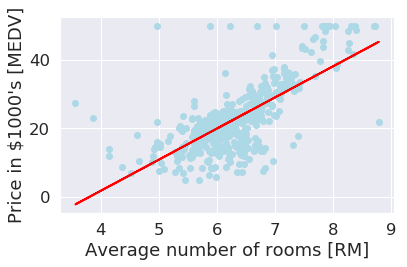

In [15]:
# Plot the data
plt.scatter(X, y, c='lightblue')
# Plot the line-of-best fit
plt.plot(X, y_pred, color='red', linewidth=2)
# Label the axes
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.tight_layout()
# The next step is optional if you want to save the image
#plt.savefig('./linear_regression.png', dpi=300)

[[back to top](#Sections)]

###### Play with the Model

###### Predict the value given an input number of rooms.

In [16]:
rms = 7.75
print('The predicted value for a {} room house is ${:6.0f}'.format(rms,slr.predict(rms)[0]*1e3))

The predicted value for a 7.75 room house is $ 35871


###### What number of rooms yields a value of $30K?

###### Inverse Interpolation Answer

In [17]:
np.interp(30,y,X[:,0])

6.03

###### What does the simple linear regression model think?

In [18]:
slr.predict(6.03)

array([20.21509638])

###### Set up a boolean vector for boolean indexing to determine the housing values that are within a chosen tolerance to \$30K

In [19]:
tolerance = 0.19
bvec = np.fabs(y-30) < tolerance

######  Here's what the data reveals:

In [20]:
# Values within the tolerance
y[bvec]

array([29.9, 30.1, 30.1, 30.1])

In [21]:
# Predicted number of rooms within that tolerance
xpredict = X[bvec];print(xpredict)

[[6.86 ]
 [6.618]
 [6.842]
 [6.728]]


###### Here's what the model predicts given the median, mean, and midpoint of these values (rooms):

In [22]:
slr.predict(np.median(xpredict)) # Median of predictions

array([27.08718866])

In [23]:
slr.predict(np.average(xpredict)) # Average of predictions

array([26.87784015])

In [24]:
slr.predict(0.5*(xpredict.min()+xpredict.max()))  # Midpoint between max and min

array([26.66849165])

###### We can guess and check to obtain the number of rooms that outputs the desired value of \$30K.

In [25]:
slr.predict(7.1055) # Guess and check

array([30.00441459])

In [26]:
# Fancier Guess and Check
v = []
r = []
for rm in np.linspace(6.5,7.5,51):
    if np.fabs(slr.predict(rm)-30) < tolerance:
        v.append(slr.predict(rm)[0])
        r.append(rm)
print('Rooms = {}'.format(r))
print('Values = {}'.format(v))

Rooms = [7.1, 7.12]
Values = [29.954352989941626, 30.136395169565233]


[[back to top](#Sections)]

### Multiclass Classification

###### Construct a function for plotting the decision regions

In [27]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, test_idx = None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface by classifying with only 2 features
    # Need to repeat for the number of additional features
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    # Plot the regions
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot class samples
    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:,0], X_test[:,1],c='k',
                   alpha = 1.0, linewidth=2, marker='.',
                   s=55,label='test set')

###### Expectations of sklearn:
<font color='blue'>
* the features and the response to be passed into the ML learning model
* only numbers are permitted in the features and response objects (NO qualitative data)
* the features and response objects to be numpy arrays (ndarrays)
* the features and response objects to have certain shapes (rows = observations, cols = features)

###### Load the Iris dataset from scikit-learn and inspect the
* keys
* targets
* target names
* encoding
* feature names

In [28]:
from sklearn.datasets import load_iris
iris = load_iris()
# sklearn data type for storing data sets and their attributes
type(iris)

sklearn.utils.Bunch

In [29]:
print('Keys:')
print(iris.keys())
print('Targets:')
print(iris.target)
print('Target Names:')
print(iris.target_names)
print('Encoding:')
print(np.unique(iris.target))
print('Feature Names:')
print(iris.feature_names)

Keys:
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
Targets:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Target Names:
['setosa' 'versicolor' 'virginica']
Encoding:
[0 1 2]
Feature Names:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [30]:
X = iris.data[:, [2,3]]            # features in vector X  petal lenght/width
y = iris.target          # responses in vector y
print('Shape of features matrix X = {}'.format(X.shape))
print('Shape of responses vector y = {}\n'.format(y.shape))
print('Class labels:', np.unique(y))

Shape of features matrix X = (150, 2)
Shape of responses vector y = (150,)

Class labels: [0 1 2]


In [30]:
# First 5 rows (observations) and all 4 columns (features) of the data
iris.data[:5,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [31]:
# First 5 rows (observations) and 2 columns (features) of the data
iris.data[:5,[2,3]]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2]])

###### In order to validate (test the performance) of the model, we split the data into a 70% training set and 30% test set (test_size=0.3); the remainder will go to training. This split is done randomly (taking a random sample from the data set to populate the training and testing sets.) The random_state is a random seed and is set so that the experiment is repeatable. If you were to run this experiment again with the same random seed, the training and test data sets would get split the same way for that next experiment. Setting the seed allows others to repeat your results.

In [32]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

###### Standardize the features:

In [33]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# Re-combine for plotting the decision regions
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

###### <font color = 'red'> K-Nearest Neighbors (KNN)

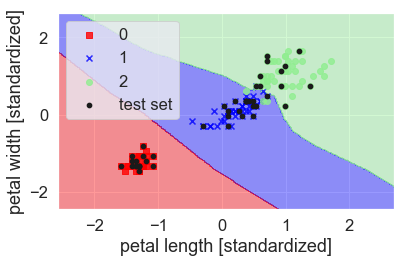

In [34]:
# Import
from sklearn.neighbors import KNeighborsClassifier
# Instantiate
knn = KNeighborsClassifier(n_neighbors=4, p=2, metric='minkowski')
# Train
knn.fit(X_train_std, y_train)
# Predict
plot_decision_regions(X=X_combined_std, y=y_combined, 
                      classifier=knn, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('./k_nearest_neighbors.png', dpi=300)
plt.show()

###### Run KNN (k = 4) on the test set to make predictions and compare those predictions to the test targets ("truth").

In [35]:
y_pred = knn.predict(X_test_std)
p = metrics.accuracy_score(y_test,y_pred)
print('KNN is {:3.2f}% accurate.'.format(p*100))

KNN is 100.00% accurate.


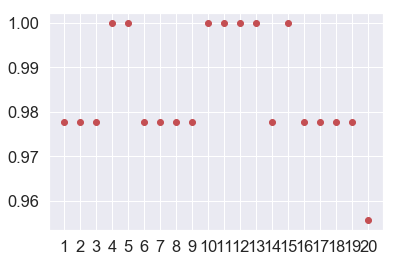

In [36]:
p = []
kvec = np.arange(1,21)
for k in kvec:
    # Instantiate
    knn = KNeighborsClassifier(n_neighbors=k, p=2, metric='minkowski')
    # Train
    knn.fit(X_train_std, y_train)
    y_pred = knn.predict(X_test_std)
    p.append(metrics.accuracy_score(y_test,y_pred))
plt.plot(kvec,p,'ro')
plt.xticks(kvec);

###### <font color = 'red'>Support Vector Machines

###### Linear Classification

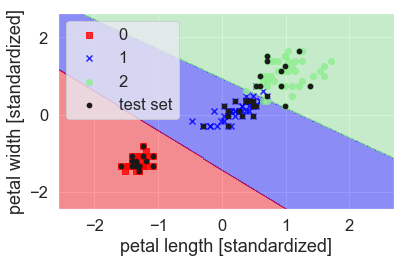

In [37]:
# Import
from sklearn.svm import SVC
# Instantiate
svmlin = SVC(kernel='linear', C=1.0, random_state=0)
# Train
svmlin.fit(X_train_std, y_train)
# Predict
plot_decision_regions(X=X_combined_std, y=y_combined, 
                      classifier=svmlin, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('./support_vector_machine_linear.png', dpi=300)
plt.show()

###### Run linear SVM on the test set to make predictions and compare those predictions to the test targets ("truth").

In [38]:
y_pred = svmlin.predict(X_test_std)
p = metrics.accuracy_score(y_test,y_pred)
print('Linear SVM is {:3.2f}% accurate.'.format(p*100))

Linear SVM is 97.78% accurate.


###### Nonlinear Classification

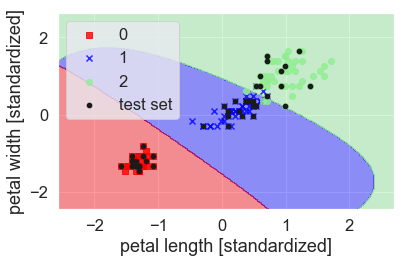

In [39]:
# Import
from sklearn.svm import SVC
# Instantiate
svm = SVC(kernel='rbf', gamma = 0.3, C = 1.0, random_state=0)
# Train
svm.fit(X_train_std, y_train)
# Predict
plot_decision_regions(X=X_combined_std, y=y_combined, 
                      classifier=svm, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('./support_vector_machine_linear.png', dpi=300)
plt.show()

###### Run Kernel (nonlinear) SVM on the test set to make predictions and compare those predictions to the test targets ("truth").

In [40]:
y_pred = svm.predict(X_test_std)
p = metrics.accuracy_score(y_test,y_pred)
print('Kernel SVM is {:3.2f}% accurate.'.format(p*100))

Kernel SVM is 97.78% accurate.


[[back to top](#Sections)]